## Source
- Cement imports data obtained from Table 3.3, page 20 from the 2023 Statistical Abstract.

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [5]:
# Cement imports data from Table 3.3, page 20 from the 2023 Statistical Abstract
cement_imports = {
    "year": [2018, 2019, 2020, 2021, 2022],
    "cement_imports": [53e3, 14e3, 14e3, 15e3, 16e3]  # in tonnes
}

cement_imports_df = pd.DataFrame(cement_imports)
cement_imports_df

,year,cement_imports
0,2018,53000.0
1,2019,14000.0
2,2020,14000.0
3,2021,15000.0
4,2022,16000.0


In [6]:
# We assume a clinker-to-cement import fraction of roughly 90%
clinker_imports_df = cement_imports_df.copy()
clinker_imports_df["net_imports_cement_clinker_tonne"] = cement_imports_df["cement_imports"] * 0.9  # in tonnes
clinker_imports_df = clinker_imports_df.drop(columns=["cement_imports"])
clinker_imports_df

,year,net_imports_cement_clinker_tonne
0,2018,47700.0
1,2019,12600.0
2,2020,12600.0
3,2021,13500.0
4,2022,14400.0


In [7]:
clinker_imports_df = gu.extend_years_backward(clinker_imports_df, "year", 2018, new_years=[2015, 2016, 2017])
clinker_imports_df

,year,net_imports_cement_clinker_tonne
0,2015,47700.0
1,2016,47700.0
2,2017,47700.0
3,2018,47700.0
4,2019,12600.0
5,2020,12600.0
6,2021,13500.0
7,2022,14400.0


In [8]:
clinker_imports_df = gu.extend_projection(clinker_imports_df, 2023, 2100)
clinker_imports_df

,year,net_imports_cement_clinker_tonne
0,2015,47700.0
1,2016,47700.0
2,2017,47700.0
3,2018,47700.0
4,2019,12600.0
...,...,...
81,2096,14400.0
82,2097,14400.0
83,2098,14400.0
84,2099,14400.0


## Validation

In [9]:
# Check for duplicates
gu.check_duplicates(clinker_imports_df)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [10]:
# Load global data
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comparing net_imports_cement_clinker_tonne...


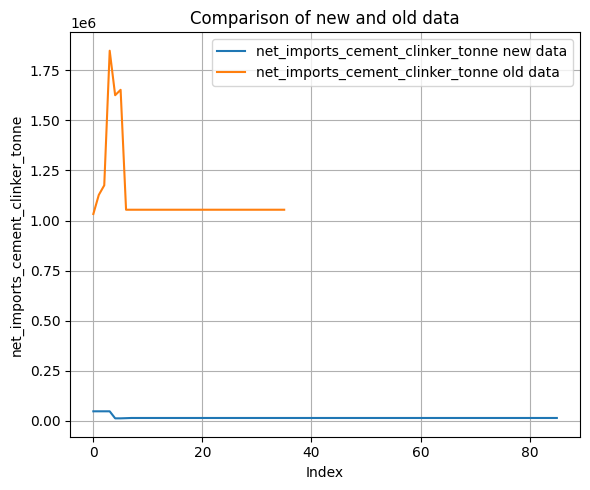

In [11]:
for col in clinker_imports_df.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(clinker_imports_df, uga_global_df, [col])

## Save

In [12]:
clinker_imports_df.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "net_imports_cement_clinker_tonne.csv"), index=False)